In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os, geopandas as gpd
shapefile_pais = "/content/drive/My Drive/SHAPEFILE/contdv250kgw/contdv250kgw.shp"
mexico=gpd.read_file(shapefile_pais)

<Axes: >

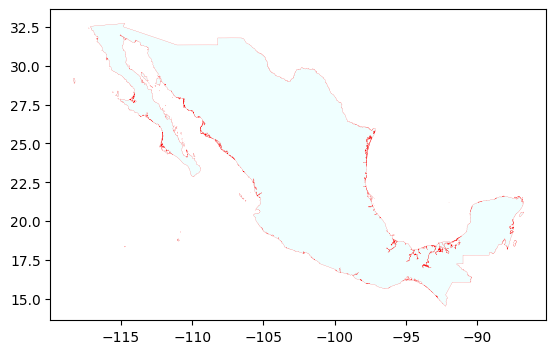

In [5]:
#el mapa de méxico
mexico.plot(facecolor="azure",
               edgecolor='red',
               linewidth=0.1)

<Axes: >

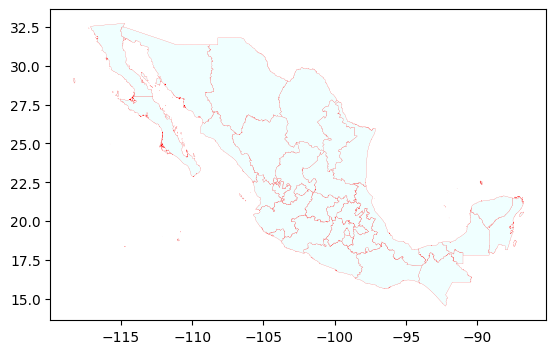

In [6]:
#los estados de méxico
shapefile_estados="/content/drive/MyDrive/SHAPEFILE/dest23gw/dest23gw.shp"
estados_mexico=gpd.read_file(shapefile_estados)
estados_mexico.plot(facecolor="azure",
               edgecolor='red',
               linewidth=0.1)

<Axes: >

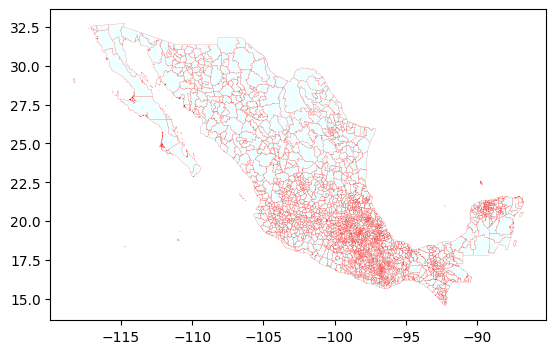

In [14]:
#los municipios de méxico
shapefile_mun = "/content/drive/MyDrive/SHAPEFILE/mun23gw/mun23gw.shp"
mun_mexico=gpd.read_file(shapefile_mun)
mun_mexico.plot(facecolor="azure",
               edgecolor='red',
               linewidth=0.1)

<Axes: >

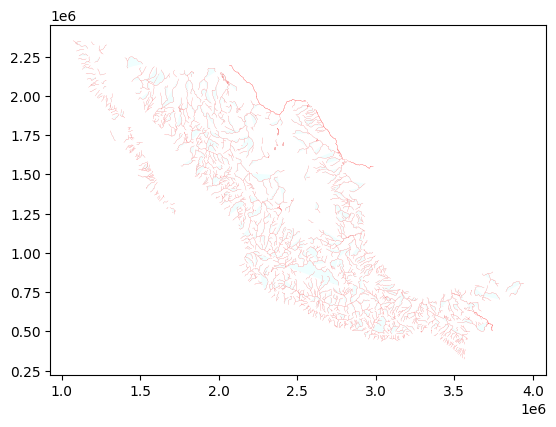

In [7]:
#los ríos de méxico
shapefile_rios = "/content/drive/MyDrive/SHAPEFILE/hidro4mgw_c/hidro4mcw.shp"
rios_mexico=gpd.read_file(shapefile_rios)
rios_mexico.plot(facecolor="azure",
               edgecolor='red',
               linewidth=0.1)

In [8]:
#tenemos que observar el sistema de referencia de coordenadas CRS
mexico.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
#comprobar las unidades de medida
mexico.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [10]:
mexico.crs.is_projected
#EL SISTEMA CRS no está proyectado

False

In [ ]:
mexico.centroid #al tratar de contrar un polígono no proyectado esto es
#lo que se obtiene

<ipython-input-21-7ff444cb4f00>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mexico.centroid


,0
0,POINT (-102.54027 23.95247)
1,POINT (-117.29763 32.44073)
2,POINT (-117.26314 32.42504)
3,POINT (-117.25997 32.41806)
4,POINT (-117.24449 32.40562)
...,...
1171,POINT (-92.81722 15.17626)
1172,POINT (-92.85644 15.16852)
1173,POINT (-92.85583 15.17278)
1174,POINT (-92.77334 15.15508)


REPROJECTING

In [ ]:
El CRS para México es 6362

In [11]:
mexico.to_crs(6362).crs.axis_info

[Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [12]:
mexico.to_crs(6362).centroid #ahora no hay ningun aviso, pues Mexico se encuentra reproyectado

,0
0,POINT (2479961.197 1322484.76)
1,POINT (1054278.241 2340947.608)
2,POINT (1057338.844 2338858.262)
3,POINT (1057555.381 2338052)
4,POINT (1058865.42 2336514.393)
...,...
1171,POINT (3491031.656 386459.875)
1172,POINT (3486859.524 385329.651)
1173,POINT (3486895.642 385807.171)
1174,POINT (3495912.76 384413.137)


<Axes: >

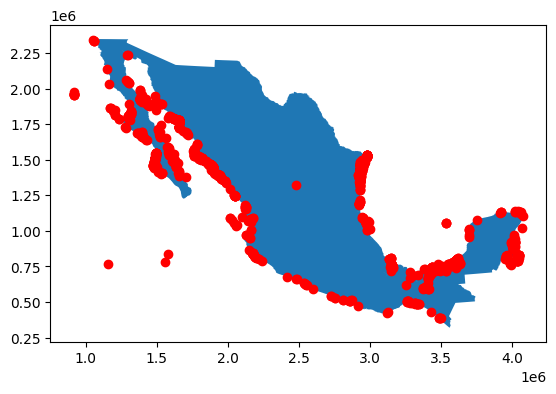

In [13]:
base6362=mexico.to_crs(6362).plot()
mexico.to_crs(6362).centroid.plot(color='red',ax=base6362)
#se graficó el poligono de méxico y su centroide despues de reproyectar al nuevo CRS

<Axes: >

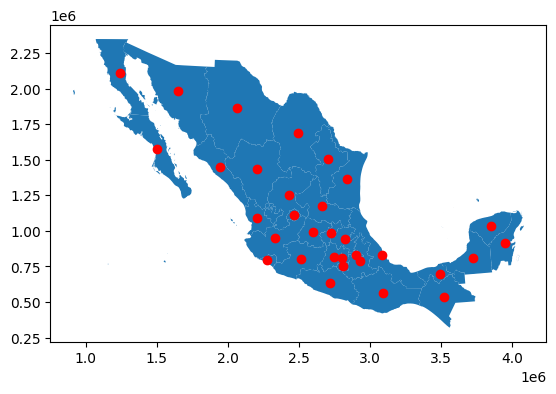

In [ ]:
base6362=estados_mexico.to_crs(6362).plot()
estados_mexico.to_crs(6362).centroid.plot(color='red',ax=base6362)
#se graficó los estados de méxico y su centroide despues de reproyectar al nuevo CRS

<Axes: >

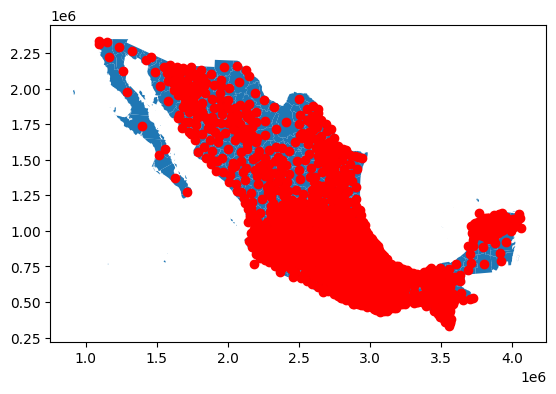

In [15]:
base6362=mun_mexico.to_crs(6362).plot()
mun_mexico.to_crs(6362).centroid.plot(color='red',ax=base6362)
#se graficó los estados de méxico y su centroide despues de reproyectar al nuevo CRS

<Axes: >

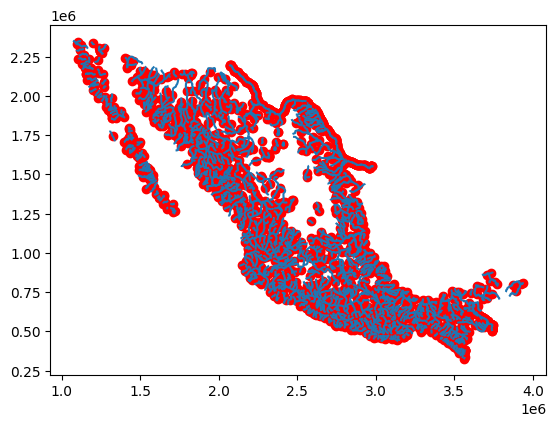

In [ ]:
base6362=rios_mexico.to_crs(6362).plot()
rios_mexico.to_crs(6362).centroid.plot(color='red',ax=base6362)
#se graficó los rios de méxico y su centroide despues de reproyectar al nuevo CRS

In [17]:
mexico_6362=mexico.to_crs(6362) #grabamos la proyección de las 4 capas

In [18]:
rios_mexico_6362=rios_mexico.to_crs(mexico_6362.crs)

In [19]:
estados_mexico_6362=estados_mexico.to_crs(mexico_6362.crs)

In [21]:
mun_mexico=mun_mexico.to_crs(mexico_6362.crs)

In [22]:
#guardamos por archivos, los exportamos
GUARDAR="/content/drive/My Drive/SHAPEFILE/MAPA6362.gpkg"
import os
mexico_6362.to_file(GUARDAR, layer='México', driver="GPKG")
estados_mexico_6362.to_file(GUARDAR, layer='Estados de México', driver="GPKG")
mun_mexico.to_file(GUARDAR, layer='Municipios de México', driver="GPKG")
rios_mexico_6362.to_file(GUARDAR, layer='Ríos de México', driver="GPKG")